In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("data/default/master_df_parsed_150.pickle", "rb") as f:
    df = pickle.load(f)

In [19]:
with open("data/default/master_df_parsed_150.pickle", "rb") as f:
    df = pickle.load(f)

df['speciation_bool'] = df['speciation_ybp'].notna()
df['speciation_ybp'] = 30000 - df['speciation_ybp']

In [20]:
df['speciation_bool'].mean()

0.371

In [22]:
df.groupby(['mate_pref'])['speciation_bool'].mean()

mate_pref
False    0.000
True     0.742
Name: speciation_bool, dtype: float64

In [21]:
df.groupby(['mate_pref','food_scheme'])['speciation_bool'].mean()

mate_pref  food_scheme
False      constant       0.000
           increasing     0.000
True       constant       0.662
           increasing     0.822
Name: speciation_bool, dtype: float64

In [23]:
df.groupby(['mate_pref'])['speciation_ybp'].median()

mate_pref
False       NaN
True     8030.0
Name: speciation_ybp, dtype: float64

In [25]:
df.groupby(['mate_pref','food_scheme'])['speciation_ybp'].mean()

mate_pref  food_scheme
False      constant               NaN
           increasing             NaN
True       constant       6850.151057
           increasing     8976.605839
Name: speciation_ybp, dtype: float64

In [33]:
df[df['speciation_bool'] == True].groupby(['mate_pref'])['max_streak'].median()

mate_pref
True    342.5
Name: max_streak, dtype: float64

In [32]:
df[df['speciation_bool'] == True].groupby(['mate_pref','food_scheme'])['max_streak'].median()

mate_pref  food_scheme
True       constant       299.0
           increasing     394.5
Name: max_streak, dtype: float64

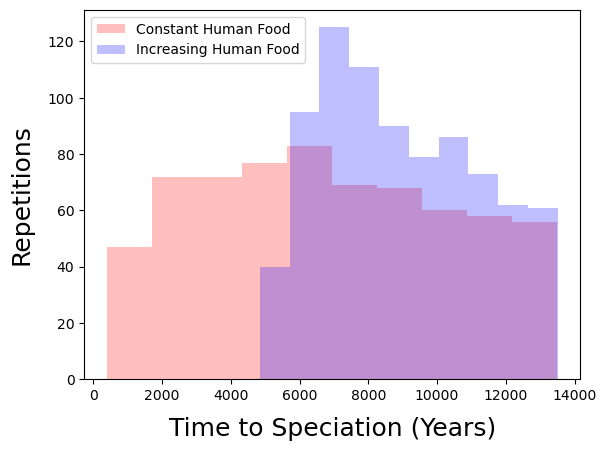

In [68]:
const_df = df[df['food_scheme'] == 'constant']
incr_df = df[df['food_scheme'] == 'increasing']

fig, ax = plt.subplots(1, 1)

ax.hist(const_df['speciation_ybp'], 
        color = 'red',
        alpha = 0.25,
        label = 'Constant Human Food',
        edgecolor = None,
        linewidth = 0
       )
ax.hist(incr_df['speciation_ybp'],
        color = 'blue', 
        alpha = 0.25,
        label = 'Increasing Human Food',
        edgecolor = None,
        linewidth = 0
       )

ax.legend(fontsize = 10, loc = "upper left")
ax.set_xlabel('Time to Speciation (Years)', fontsize = 18, labelpad = 10)
ax.set_ylabel('Repetitions', fontsize = 18, labelpad = 10)
fig.savefig('figures/default_distributions/time_to_speciation_150.png', bbox_inches='tight', dpi = 800)

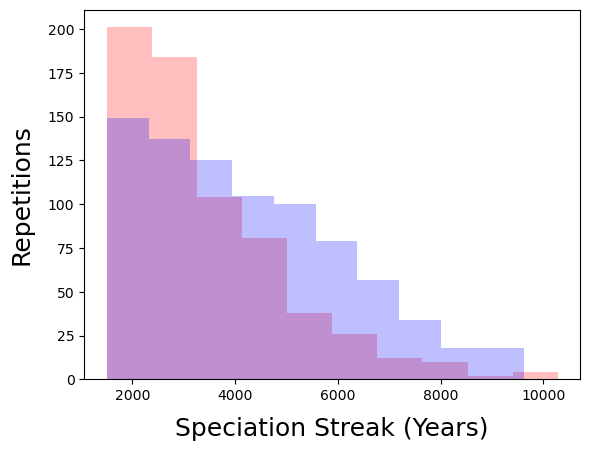

In [69]:
const_df = df[df['food_scheme'] == 'constant']
incr_df = df[df['food_scheme'] == 'increasing']

fig, ax = plt.subplots(1, 1)

ax.hist(const_df[const_df['speciation_bool']]['max_streak']*10, 
        color = 'red',
        alpha = 0.25,
        label = 'Constant Human Food',
        edgecolor = None,
        linewidth = 0
       )
ax.hist(incr_df[incr_df['speciation_bool']]['max_streak']*10,
        color = 'blue', 
        alpha = 0.25,
        label = 'Increasing Human Food',
        edgecolor = None,
        linewidth = 0
       )

#ax.legend(fontsize = 14, loc = "upper right")
ax.set_xlabel('Speciation Streak (Years)', fontsize = 18, labelpad = 10)
ax.set_ylabel('Repetitions', fontsize = 18, labelpad = 10)
fig.savefig('figures/default_distributions/speciation_streak_150.png', bbox_inches='tight', dpi = 800)

### 